<a href="https://colab.research.google.com/github/angel442002/repositorio_tareas/blob/main/Tarea-practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Práctica: Dateset PIMA

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. **Missing values are believed to be encoded with zero values**. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

Más información: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [50]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url,header=None)

df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


⭕ Ejercicio 1

* Modificar el nombre de las columnas de acuerdo a la información anterior.

* Hacer un análisis exploratorio:
    * ¿Qué tipo de variable es cada columna?
    * ¿Hay datos faltantes en alguna columna? Toma en cuenta la información del dataset y auxiliate de histogramas y otras herramientas exploratorias.
    * ¿Qué variable tiene más datos faltantes?
    * ¿Qué rango tienen los datos en cada columna?

In [51]:
#Renombramos columnas
df.columns = ["Embarazos","Glucosa","Presión Arterial","Grosor de piel","Insulina","BMI","Diabetes Pedigri","Edad","Resultados"]
df.head()



,Embarazos,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI,Diabetes Pedigri,Edad,Resultados
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
#Vemos el tipo de datos
df.dtypes


,0
Embarazos,int64
Glucosa,int64
Presión Arterial,int64
Grosor de piel,int64
Insulina,int64
BMI,float64
Diabetes Pedigri,float64
Edad,int64
Resultados,int64


In [53]:
#Vemos los estadisticos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Embarazos         768 non-null    int64  
 1   Glucosa           768 non-null    int64  
 2   Presión Arterial  768 non-null    int64  
 3   Grosor de piel    768 non-null    int64  
 4   Insulina          768 non-null    int64  
 5   BMI               768 non-null    float64
 6   Diabetes Pedigri  768 non-null    float64
 7   Edad              768 non-null    int64  
 8   Resultados        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
#Contamos los valores faltantes
df.isnull()
#Y contamos
df.isnull().sum()

,0
Embarazos,0
Glucosa,0
Presión Arterial,0
Grosor de piel,0
Insulina,0
BMI,0
Diabetes Pedigri,0
Edad,0
Resultados,0


In [55]:
#Ahora exploramos los valores 0, osea que no existan
(df == 0).sum()

,0
Embarazos,111
Glucosa,5
Presión Arterial,35
Grosor de piel,227
Insulina,374
BMI,11
Diabetes Pedigri,0
Edad,0
Resultados,500


In [56]:
#Observamos que hay valores que un 0 si es posible, glucosa, presión, IMC, Insulina, y la piel
columnasf=["Glucosa","Presión Arterial","Grosor de piel","Insulina","BMI"]
df[columnasf].describe()

,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


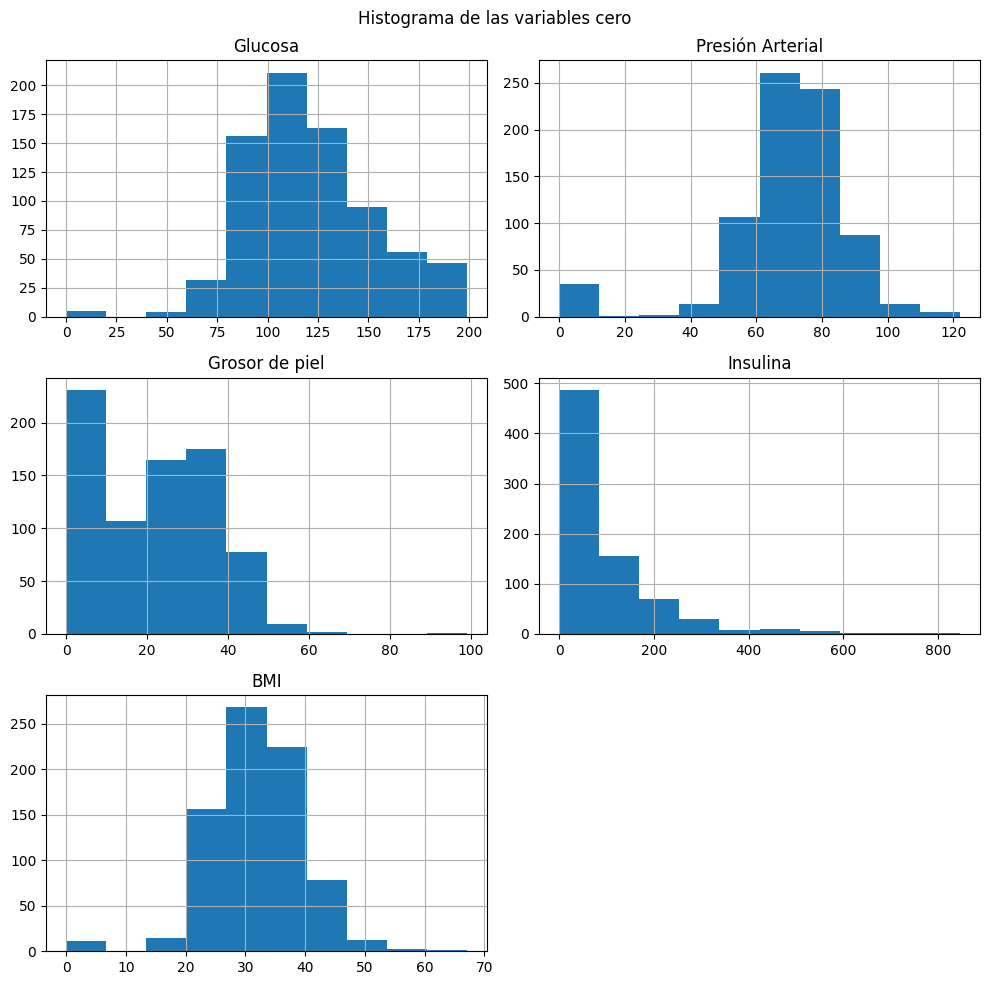

In [57]:
#Vemos los histogramas
import matplotlib.pyplot as plt
df[columnasf].hist(figsize=(10,10))
plt.suptitle("Histograma de las variables cero")
plt.tight_layout()
plt.show()

['Embarazos', 'Glucosa', 'Presión Arterial', 'Grosor de piel', 'Insulina', 'BMI', 'Diabetes Pedigri', 'Edad']


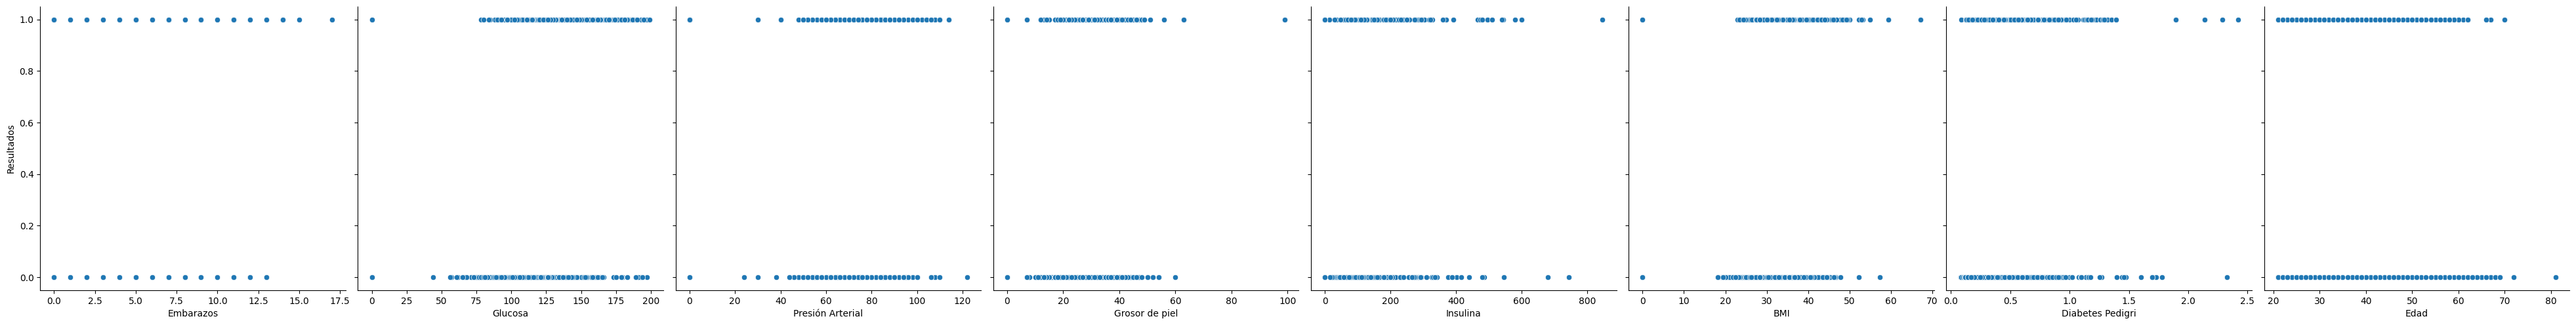

In [58]:
import seaborn as sns
columns=["Glucosa","Presión Arterial","Grosor de piel","Insulina","BMI"]
print(df.columns.to_list()[0:8])
sns.pairplot(df,x_vars=df.columns.to_list()[0:8],y_vars="Resultados",height=5,aspect=1)
plt.show()

In [59]:
faltantes = (df[columnasf] == 0).sum().sort_values(ascending=False)
print(faltantes)

Insulina            374
Grosor de piel      227
Presión Arterial     35
BMI                  11
Glucosa               5
dtype: int64


In [60]:
#Y por último el rango
df.describe()

,Embarazos,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI,Diabetes Pedigri,Edad,Resultados
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


⭕ Ejercicio 2

Realizar las siguientes tareas de preprocesamiento:

* Para lididar con los valores faltantes hay dos opciones: Eliminar los renglones con valores faltantes o imputarlos. ¿Cuál eliges y por qué? Realiza esta tarea en todas las columnas.
* Filtrar los valores del BMI en algún rango de tu elección.
* Normalizar todos los valores continuos.
* Cambiar las variables categóricas por *one-hot*

In [61]:
#Sabemos que hay variables con valores faltantes implicitos, los que dicen 0,
#Ya habiamos hecho un análisis para ver culaes son
columnasf

['Glucosa', 'Presión Arterial', 'Grosor de piel', 'Insulina', 'BMI']

In [62]:
#Vamos a contar
filasnulas=(df[columnasf]==0).any(axis=1).sum()
totalfilas=len(df)
print(f"Filas con valores faltantes: {filasnulas}")
print(f"Porcentaje de filas con valores faltantes: {filasnulas/totalfilas*100}%")

Filas con valores faltantes: 376
Porcentaje de filas con valores faltantes: 48.95833333333333%


Vemos que eliminar el 50% del data no es la mejor opción por lo que tenemos que imputar los datos.



In [63]:
import numpy as np
#hacemos una copia antes para nuestros datos
dfantes=df.copy()
#Primero remplazamos los ceros por NaN
df[columnasf]=df[columnasf].replace(0,np.nan)
df.isnull().sum()

,0
Embarazos,0
Glucosa,5
Presión Arterial,35
Grosor de piel,227
Insulina,374
BMI,11
Diabetes Pedigri,0
Edad,0
Resultados,0


In [65]:
#Imputamos con la media
df[columnasf]=df[columnasf].fillna(df[columnasf].mean())
#AHora el dataset ya no tien valores faltantes


In [64]:
df[columnasf].describe()

,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI
count,763.000000,733.000000,541.000000,394.000000,757.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.535641,12.382158,10.476982,118.775855,6.924988
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,22.000000,76.250000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,141.000000,80.000000,36.000000,190.000000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


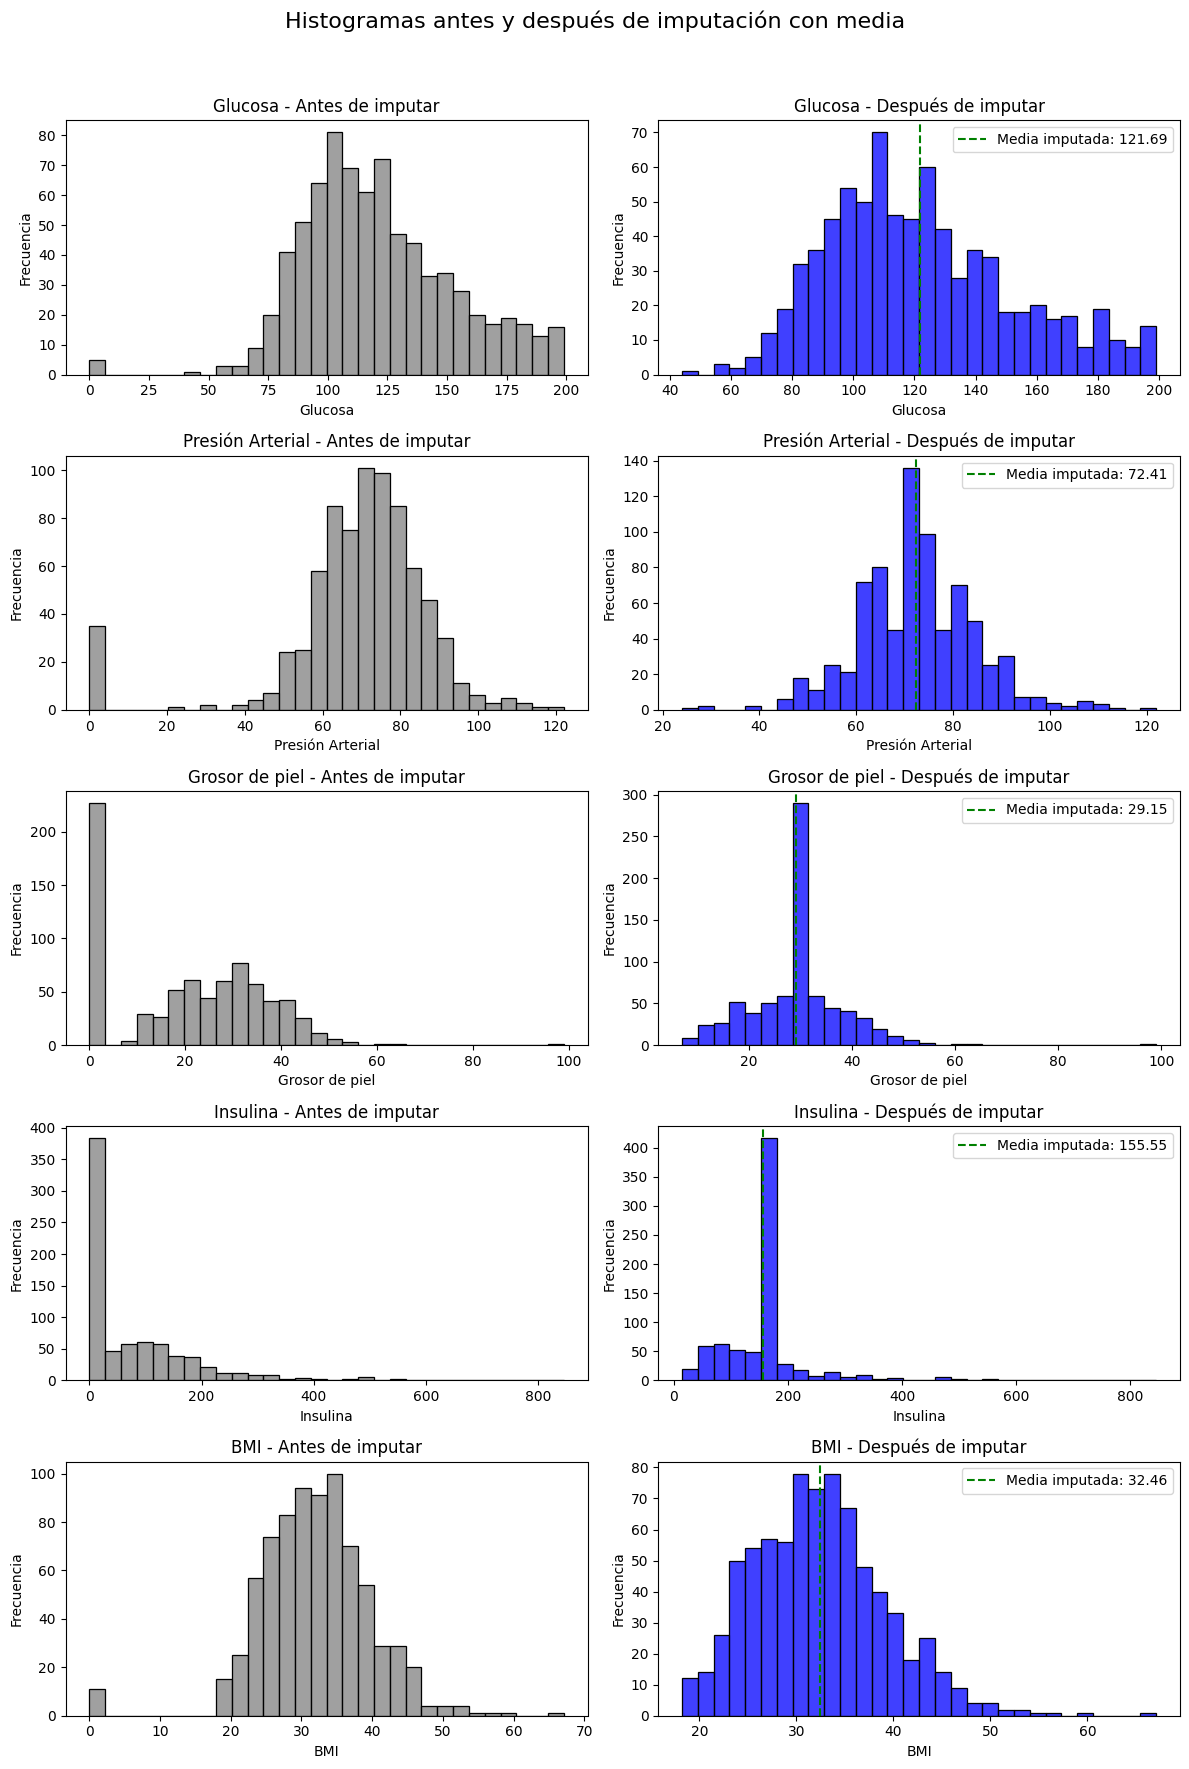

In [67]:
#Veamos los datos en unos histogramas para ver nuestros valores antes y nuestros valores después
fig, axes = plt.subplots(nrows=len(columnasf), ncols=2, figsize=(12, 18))
fig.suptitle("Histogramas antes y después de imputación con media", fontsize=16)


for i, col in enumerate(columnasf):
    # Histograma antes
    sns.histplot(dfantes[col], bins=30, kde=False, ax=axes[i, 0], color="gray")
    axes[i, 0].set_title(f"{col} - Antes de imputar")
    axes[i, 0].set_ylabel("Frecuencia")

    # Histograma después (con imputación)
    sns.histplot(df[col], bins=30, kde=False, ax=axes[i, 1], color="blue")
    axes[i, 1].set_title(f"{col} - Después de imputar")
    axes[i, 1].set_ylabel("Frecuencia")
    media_valor = df[col].mean()
    axes[i, 1].axvline(media_valor, color='green', linestyle='--', label=f"Media imputada: {media_valor:.2f}")
    axes[i, 1].legend()

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Ahora vamos con el BMI, para filtrarlo en un rango adecuado **

In [34]:
#Vamos a filtrar con los valores entre 15 y 50  por valores realistas en la OMS

df=df[(df['BMI'] >= 15) & (df['BMI'] <= 50)]



In [36]:
#Normalizamos con las variables continuas
from sklearn.preprocessing import MinMaxScaler
variablesc=["Glucosa","Presión Arterial","Grosor de piel","Insulina","BMI","Edad","Diabetes Pedigri"]
escalar= MinMaxScaler()
df[variablesc]=escalar.fit_transform(df[variablesc])
df[variablesc].describe()

,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI,Edad,Diabetes Pedigri
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.500156,0.492921,0.239367,0.168609,0.440493,0.205132,0.173626
std,0.196232,0.121291,0.094110,0.099940,0.202649,0.196524,0.144266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354839,0.408163,0.195652,0.128761,0.292453,0.050000,0.073079
50%,0.470968,0.489796,0.240798,0.169131,0.444969,0.133333,0.129720
75%,0.619355,0.571429,0.271739,0.169131,0.572327,0.333333,0.242781
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Para el último paso
df=pd.get_dummies(df,columns=["Embarazos"])
df

,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI,Diabetes Pedigri,Edad,Resultados,Embarazos_0,Embarazos_1,...,Embarazos_7,Embarazos_8,Embarazos_9,Embarazos_10,Embarazos_11,Embarazos_12,Embarazos_13,Embarazos_14,Embarazos_15,Embarazos_17
0,0.670968,0.489796,0.304348,0.169131,0.484277,0.243892,0.483333,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.264516,0.428571,0.239130,0.169131,0.264151,0.121279,0.166667,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.896774,0.408163,0.240798,0.169131,0.160377,0.263883,0.183333,1,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.290323,0.428571,0.173913,0.095066,0.311321,0.039538,0.000000,0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.600000,0.163265,0.304348,0.184116,0.783019,0.981786,0.200000,1,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.198556,0.462264,0.041315,0.700000,0,False,False,...,False,False,False,True,False,False,False,False,False,False
764,0.503226,0.469388,0.217391,0.169131,0.584906,0.116393,0.100000,0,False,False,...,False,False,False,False,False,False,False,False,False,False
765,0.496774,0.489796,0.173913,0.116727,0.251572,0.074189,0.150000,0,False,False,...,False,False,False,False,False,False,False,False,False,False
766,0.529032,0.367347,0.240798,0.169131,0.374214,0.120391,0.433333,1,False,True,...,False,False,False,False,False,False,False,False,False,False


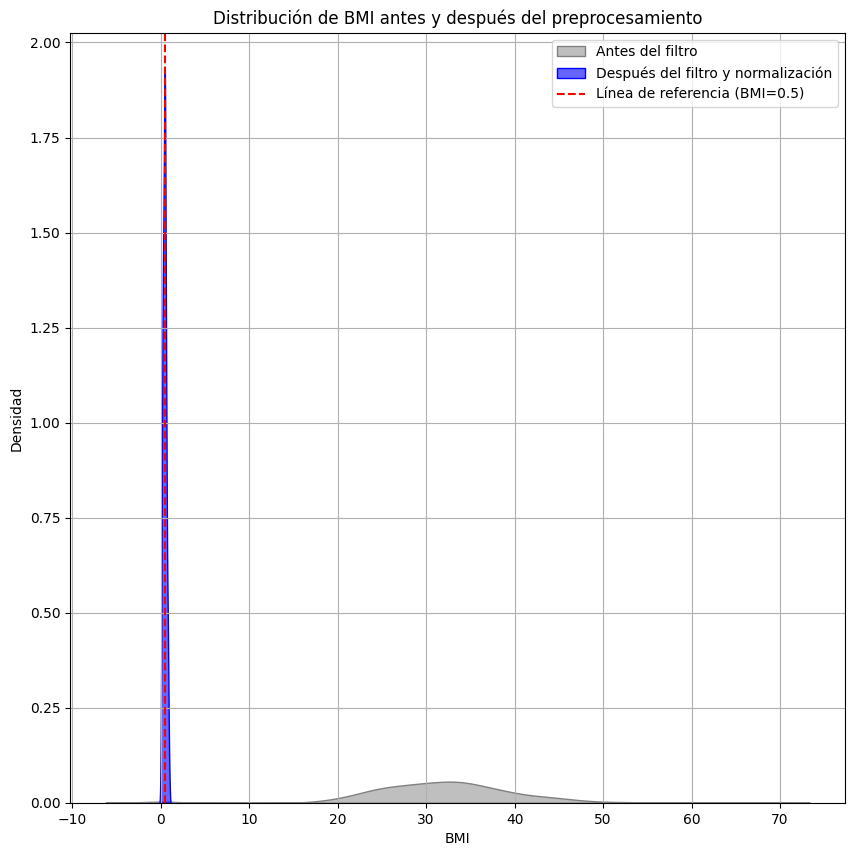

In [39]:
#Vamos a visualizar lo que hicimos.
dforiginal=pd.read_csv(url,header=None)
dforiginal.columns = ["Embarazos", "Glucosa", "Presión Arterial", "Grosor de piel","Insulina", "BMI", "Diabetes Pedigri", "Edad", "Resultado"]
plt.figure(figsize=(10,10))
sns.kdeplot(dforiginal["BMI"], label="Antes del filtro", fill=True, color="gray", alpha=0.5)
sns.kdeplot(df["BMI"], label="Después del filtro y normalización", fill=True, color="blue", alpha=0.6)
plt.axvline(0.5, color="red", linestyle="--", label="Línea de referencia (BMI=0.5)")

plt.title("Distribución de BMI antes y después del preprocesamiento")
plt.xlabel("BMI")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

In [70]:
#Análizamos elos datos
print("Dimensiones finales del dataset:", df.shape)
print("\nPrimeras filas del dataset final:")
display(df.head())

print("\nEstadísticos generales:")
display(df.describe())

Dimensiones finales del dataset: (768, 9)

Primeras filas del dataset final:


,Embarazos,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI,Diabetes Pedigri,Edad,Resultados
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1



Estadísticos generales:


,Embarazos,Glucosa,Presión Arterial,Grosor de piel,Insulina,BMI,Diabetes Pedigri,Edad,Resultados
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-72-540b988fa1b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Resultados", data=df, palette="pastel")


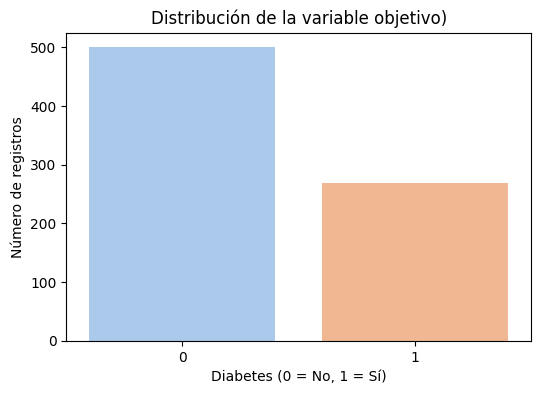

In [72]:
#Vemos si las variables de salida están balanceada con la siguiente figura:
plt.figure(figsize=(6,4))
sns.countplot(x="Resultados", data=df, palette="pastel")
plt.title("Distribución de la variable objetivo)")
plt.xlabel("Diabetes (0 = No, 1 = Sí)")
plt.ylabel("Número de registros")
plt.show()

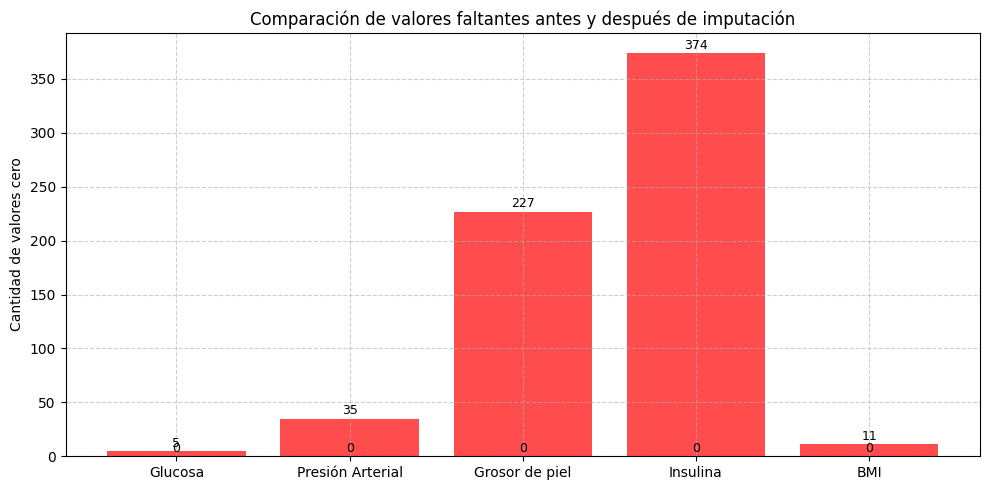

In [81]:
#Mostramos los valores faltantes antes de inputaar y cuales quedaron
import numpy as np


faltantes_antes = (dfantes[columnasf] == 0).sum()
faltantes_despues = (df[columnasf] == 0).sum()
plt.figure(figsize=(10,5))
bars1 = plt.bar(columnasf, faltantes_antes, alpha=0.7, label="Antes (valores 0)", color="red")
bars2 = plt.bar(columnasf, faltantes_despues, alpha=0.7, label="Después (valores 0)", color="green")

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, int(height), ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, int(height), ha='center', va='bottom', fontsize=9)

plt.title("Comparación de valores faltantes antes y después de imputación")
plt.ylabel("Cantidad de valores cero")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()